First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0


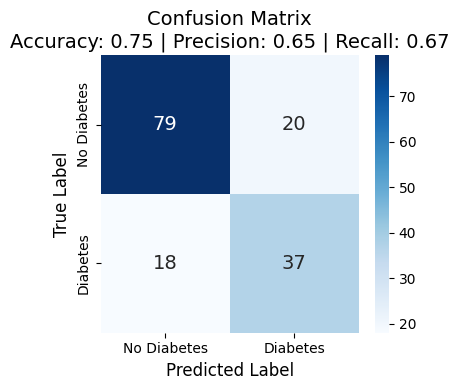


--- Performing Clustering ---



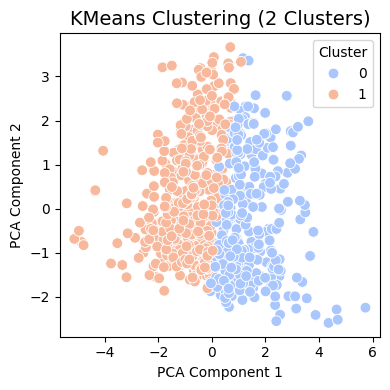

In [8]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# --- Load Dataset ---
df = pd.read_csv('/content/2. Diagnose Diabetes.csv')

# --- Quick View ---
print("First 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# --- Classification Task ---
if 'Outcome' in df.columns:
    print("\n--- Performing Classification ---\n")

    # Features and Labels
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Model Training
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Precision: {prec:.4f}")
    print(f"✅ Recall: {rec:.4f}")
    print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = ['No Diabetes', 'Diabetes']

    # Plotting Heatmap with Metrics
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 14})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix\nAccuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f}', fontsize=14)
    plt.tight_layout()
    plt.show()

else:
    print("❌ 'Outcome' column not found. Skipping classification.")

# --- Clustering Task (Unsupervised) ---
print("\n--- Performing Clustering ---\n")

# Drop 'Outcome' if present for clustering
if 'Outcome' in df.columns:
    clustering_data = df.drop('Outcome', axis=1)
else:
    clustering_data = df.copy()

# Standardize
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(clustering_scaled)

# Plotting the clusters
plt.figure(figsize=(4,4))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=clusters, palette='coolwarm', s=60)
plt.title('KMeans Clustering (2 Clusters)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
